**Importion of Data, and PreProcessing of Dataset**

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('client_hostname.csv')

# Drop rows with any missing values
data.dropna(inplace=True)

# Define the number of samples you want after undersampling
desired_sample_size = 70000

# Check if the current number of rows is greater than your desired sample size
if len(data) > desired_sample_size:
    # Perform undersampling
    df = data.sample(n=desired_sample_size, random_state=42)
else:
    df = data

# Now df is the DataFrame with the undersampled data
print("Shape of the undersampled data:", df.shape)


Shape of the undersampled data: (5815, 4)


**Logistic Regression Algorithm**

Accuracy: 0.03


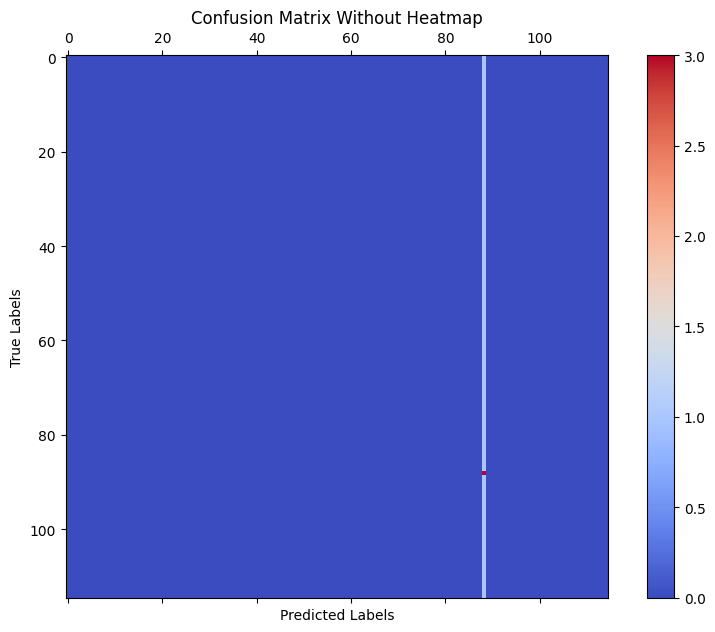

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Load and preprocess the dataset, assumed to be already loaded into df

# Sample a smaller subset of the data for quicker computation
df_sample = df.sample(frac=0.1, random_state=42)  # Adjust frac to your needs

# Specify the features and the target
X = df_sample.drop('hostname', axis=1)  # Features
y = df_sample['hostname']  # Target variable

# Encode categorical data if necessary
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
plt.matshow(cm, cmap='coolwarm', fignum=1)  # Use a simple color map
plt.title('Confusion Matrix Without Heatmap')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**Decision Tree Algorithm**

Accuracy: 0.03


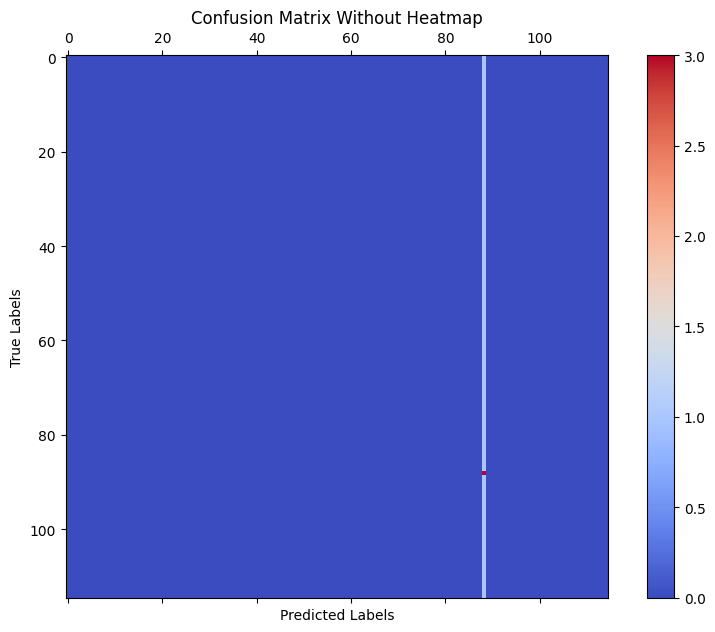

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Load and preprocess the dataset, assumed to be already loaded into df

# Sample a smaller subset of the data for quicker computation
df_sample = df.sample(frac=0.1, random_state=42)  # Adjust frac to your needs

# Specify the features and the target
X = df_sample.drop('hostname', axis=1)  # Features
y = df_sample['hostname']  # Target variable

# Encode categorical data if necessary
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
plt.matshow(cm, cmap='coolwarm', fignum=1)  # Use a simple color map
plt.title('Confusion Matrix Without Heatmap')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**Feature Importance curve**

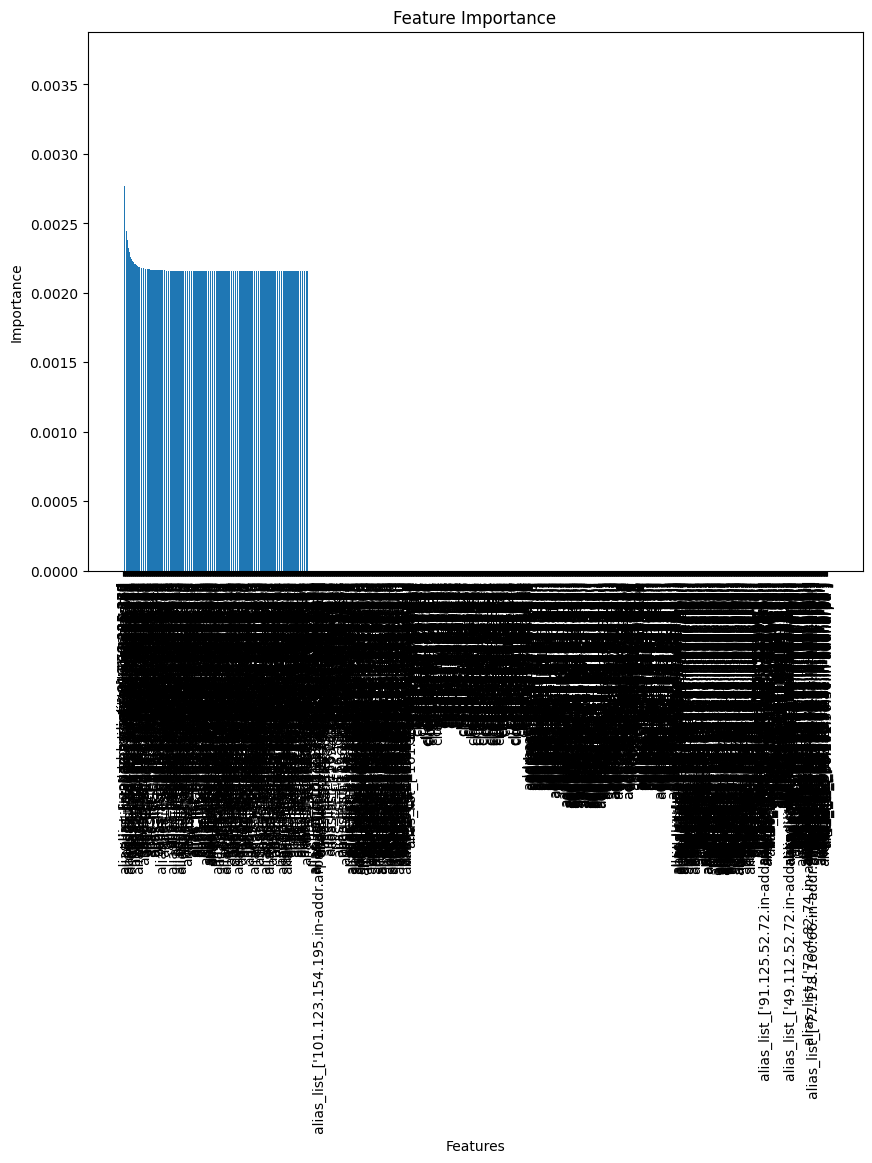

In [4]:
import matplotlib.pyplot as plt

# Assuming dt_classifier is your trained Decision Tree model and X_train contains your feature data
feature_importances = dt_classifier.feature_importances_
features = X_train.columns

# Sort the feature importances in descending order and plot them
sorted_idx = feature_importances.argsort()[::-1]
plt.figure(figsize=(10,7))
plt.bar(features[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)  # Rotate feature names for better visibility
plt.show()


**Learning curve**

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


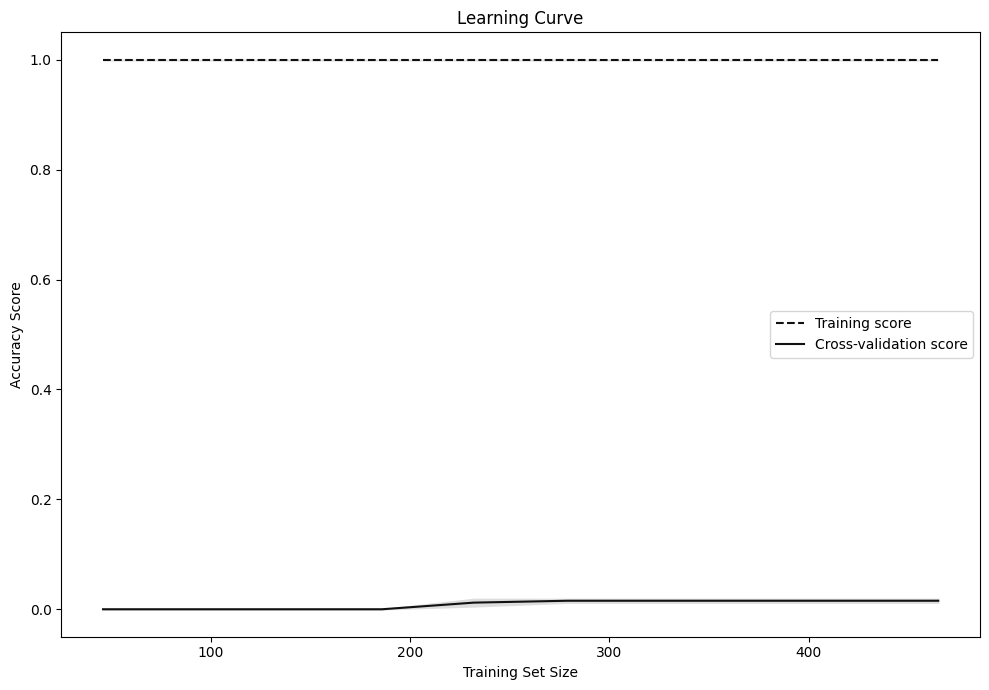

In [6]:
from sklearn.model_selection import learning_curve
import numpy as np


train_sizes, train_scores, test_scores = learning_curve(dt_classifier, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,7))
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands for the standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [7]:
pip install graphviz


In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

# Load and preprocess the dataset, assumed to be already loaded into df
df_sample = df.sample(frac=0.1, random_state=42)  # Use a smaller sample for quick processing

# Specify the features and the target
X = df_sample.drop('hostname', axis=1)  # Features
y = df_sample['hostname']  # Target variable

# Encode categorical data if necessary
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with a maximum depth
dt_classifier = DecisionTreeClassifier(max_depth=3)  # Limit the depth to keep the tree small

# Train the model
dt_classifier.fit(X_train, y_train)

# Export the tree in DOT format
dot_data = export_graphviz(dt_classifier, out_file=None,
                           feature_names=X_train.columns,
                           class_names=y.unique(),
                           filled=True, rounded=True,
                           special_characters=True)
# Generate a graph from DOT data
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves the tree diagram to a file named 'decision_tree.pdf'

# Optionally, display the graph within the notebook or Python script
graph.view()


'decision_tree.pdf'